# Exploring Stock Returns 


## Objective

In this notebook, we will analyze the daily returns of two stocks: **BEML** and **Glaxo**. The goal is to understand the concept of **normal distribution** and its applications in measuring **stock risk**.

### What we will do:
1. Compute daily returns for the stocks.
2. Visualize their distributions.
3. Compare the risk of both stocks using standard deviation.
4. Calculate thresholds for significant gains or losses.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
beml_data = pd.read_csv('../Data/BEML.csv')
glaxo_data = pd.read_csv('../Data//GLAXO.csv')

# Display the first few rows of both datasets
beml_data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42



### Class Question:
- What information does the `Close` column provide? Why might we use this column to calculate daily returns?


In [5]:
# Compute daily returns for both stocks
beml_data['Daily Return'] = beml_data['Close'].pct_change() * 100  # Daily returns in percentage
glaxo_data['Daily Return'] = glaxo_data['Close'].pct_change() * 100  # Daily returns in percentage

# Drop NaN values
beml_data.dropna(subset=['Daily Return'], inplace=True)
glaxo_data.dropna(subset=['Daily Return'], inplace=True)

# Display summary statistics of daily returns
beml_data['Daily Return'].describe(), glaxo_data['Daily Return'].describe()


(count    1738.000000
 mean        0.027075
 std         2.643083
 min       -13.394047
 25%        -1.373597
 50%        -0.154098
 75%         1.198463
 max        19.832941
 Name: Daily Return, dtype: float64,
 count    1738.000000
 mean        0.038604
 std         1.336054
 min        -7.471894
 25%        -0.585048
 50%        -0.002068
 75%         0.582551
 max        18.919578
 Name: Daily Return, dtype: float64)


### Key Observations:
1. **BEML:** The standard deviation of daily returns is higher, indicating more volatility (risk).
2. **Glaxo:** The standard deviation is lower, meaning it's a less risky stock.

### Class Question:
- What does the mean value of daily returns signify? Why is it close to zero for most stocks?


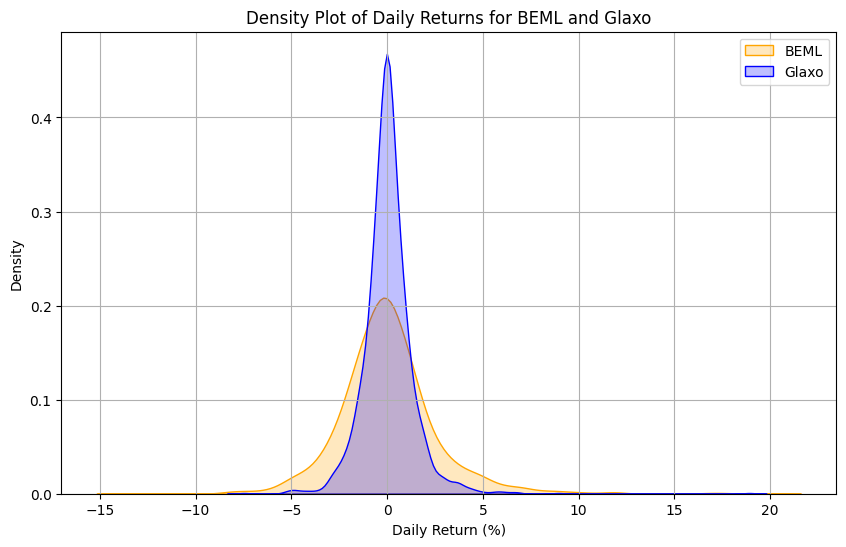

In [6]:
# Visualize the distributions of daily returns
plt.figure(figsize=(10, 6))
sns.kdeplot(beml_data['Daily Return'], label="BEML", color="orange", fill=True)
sns.kdeplot(glaxo_data['Daily Return'], label="Glaxo", color="blue", fill=True)
plt.title("Density Plot of Daily Returns for BEML and Glaxo")
plt.xlabel("Daily Return (%)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



### Analysis:
- The blue curve (Glaxo) is narrower, meaning it has less variation in daily returns.
- The orange curve (BEML) is wider, suggesting higher volatility.

### Class Question:
- How can we interpret the risk of a stock from the shape of its return distribution?


In [11]:
from scipy.stats import norm

mean_beml = beml_data['Daily Return'].mean()
std_beml = beml_data['Daily Return'].std()
threshold = 3  # Percentage

# Calculate z-scores for both stocks
z_beml = (threshold - mean_beml) / std_beml
z_glaxo = (threshold - glaxo_data['Daily Return'].mean()
           ) / glaxo_data['Daily Return'].std()

# Compute probabilities for returns > 3%
prob_beml = 1 - norm.cdf(z_beml)  # Greater than 3%
prob_glaxo = 1 - norm.cdf(z_glaxo)  # Greater than 3%

prob_beml, prob_glaxo

(np.float64(0.13033807841767375), np.float64(0.013327806353720772))

In [10]:
from scipy.stats import norm

# Calculate 2% loss or gain thresholds for BEML
mean_beml = beml_data['Daily Return'].mean()
std_beml = beml_data['Daily Return'].std()
threshold = 2  # Percentage

# Calculate z-scores for both stocks
z_beml = (threshold - mean_beml) / std_beml
z_glaxo = (threshold - glaxo_data['Daily Return'].mean()
           ) / glaxo_data['Daily Return'].std()

# Compute probabilities for returns > 3%
prob_beml = 1 - norm.cdf(z_beml)  # Greater than 3%
prob_glaxo = 1 - norm.cdf(z_glaxo)  # Greater than 3%

prob_beml, prob_glaxo

(np.float64(0.22769829484075355), np.float64(0.07104511457618579))

In [7]:


# 2% loss and gain thresholds
loss_threshold = mean_beml - 2 * std_beml
gain_threshold = mean_beml + 2 * std_beml

loss_threshold, gain_threshold


(np.float64(-5.259091485789251), np.float64(5.313241101600698))


### Thresholds for BEML:
- **2% Loss Threshold**: -5.26%
- **2% Gain Threshold**: 5.31%

This means that any daily return below -5.26% is a significant loss, while any return above 5.31% is a significant gain.

### Class Activity:
- Calculate the 2% loss and gain thresholds for Glaxo stock using the same method.


In [8]:
# Calculate 2% loss and gain thresholds for Glaxo
mean_glaxo = glaxo_data['Daily Return'].mean()
std_glaxo = glaxo_data['Daily Return'].std()

# 2% loss and gain thresholds
loss_threshold_glaxo = mean_glaxo - 2 * std_glaxo
gain_threshold_glaxo = mean_glaxo + 2 * std_glaxo

loss_threshold_glaxo, gain_threshold_glaxo


(np.float64(-2.6335036021914386), np.float64(2.7107118187098966))


### Conclusion:
1. **Risk Comparison**: BEML is riskier than Glaxo based on standard deviation and the wider spread of its returns.
2. **Practical Insights**: Thresholds help us understand significant changes in stock prices, aiding in decision-making.
